In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
img = cv2.imread("../word_3.png")
gray= cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

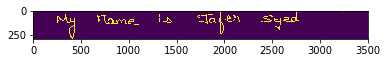

In [6]:
plt.imshow(thresh)

In [7]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

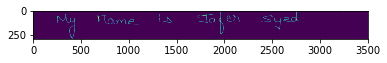

In [11]:
plt.imshow(dist_transform)

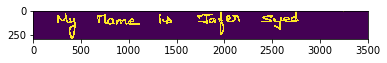

In [26]:
plt.imshow(unknown)

In [28]:
cv2.imwrite("res_1.png",unknown)

True

In [22]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# # Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# # Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [23]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

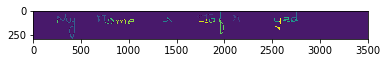

In [24]:
plt.imshow(markers)

In [25]:
cv2.imwrite("res.png",markers)

True